<a href="https://colab.research.google.com/github/DrobertP/College-Projects/blob/main/Multi%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Models

In [1]:
# Importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Import Data

In [2]:
# Importing data
df = pd.read_csv('Real-estate.csv')
print("Original dataset shape:", df.shape)
print("Columns:", df.columns)

Original dataset shape: (414, 8)
Columns: Index(['No', 'Transaction Date', 'House Age',
       'Distance to the nearest MRT station', 'Number of convenience stores',
       'Latitude', 'Longitude', 'House Price'],
      dtype='object')


In [3]:
# Remove the Column name "NO"
df.drop('No', inplace=True, axis=1)
print("Dataset shape after dropping 'No' column:", df.shape)
print("Remaining columns:", df.columns)

Dataset shape after dropping 'No' column: (414, 7)
Remaining columns: Index(['Transaction Date', 'House Age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude', 'House Price'],
      dtype='object')


In [4]:
# Display the first few rows of the dataset
print("\nHead of the dataset:")
print(df.head())


Head of the dataset:
   Transaction Date  House Age  Distance to the nearest MRT station  \
0          2012.917       32.0                             84.87882   
1          2012.917       19.5                            306.59470   
2          2013.583       13.3                            561.98450   
3          2013.500       13.3                            561.98450   
4          2012.833        5.0                            390.56840   

   Number of convenience stores  Latitude  Longitude  House Price  
0                            10  24.98298  121.54024         37.9  
1                             9  24.98034  121.53951         42.2  
2                             5  24.98746  121.54391         47.3  
3                             5  24.98746  121.54391         54.8  
4                             5  24.97937  121.54245         43.1  


In [5]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Number of convenience stores', y='House Price', data=df)
plt.title('House Price vs. Number of Convenience Stores')
plt.savefig('convenience_stores_vs_price.png')
plt.close()

In [6]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.close()

In [7]:
# Creating feature variables
X = df.drop('House Price', axis=1)
y = df['House Price']

In [8]:
# Feature scaling - important for SVR
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [9]:
# Creating train and test sets with both scaled and unscaled features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_df, y, test_size=0.3, random_state=70)

In [10]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (289, 6)
Testing set shape: (125, 6)


In [11]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f'R2 Score: {r2:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')

    return r2, mse, mae

# Model 1: Linear Regression

In [12]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [13]:
# Sample predictions vs actual values
print("\nLinear Regression - Sample Predictions vs Actual Values:")
sample_compare = pd.DataFrame({'Actual': y_test.iloc[0:10].values, 'Predicted': lr_predictions[0:10]})
print(sample_compare)

#Model evaluation
lr_metrics = evaluate_model(y_test, lr_predictions, "Linear Regression")


Linear Regression - Sample Predictions vs Actual Values:
   Actual  Predicted
0    19.2  12.638304
1    11.2  10.030446
2    24.7  22.988074
3    46.1  48.502648
4    31.3  32.671405
5    31.1  37.825727
6    30.5  36.091781
7    42.2  41.059536
8    51.0  47.848308
9    39.1  40.457475

Linear Regression Performance:
R2 Score: 0.6509
Mean Squared Error: 46.2118
Mean Absolute Error: 5.3923


# Model 2: Decision tree Regressor

In [14]:
# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=101)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Model evaluation
dt_metrics = evaluate_model(y_test, dt_predictions, "Decision Tree")


Decision Tree Performance:
R2 Score: 0.4256
Mean Squared Error: 76.0427
Mean Absolute Error: 6.2580


# Model 3: Random Forest Regressor

In [15]:
# Model 3: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=101)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Model evaluation
rf_metrics = evaluate_model(y_test, rf_predictions, "Random Forest")


Random Forest Performance:
R2 Score: 0.7431
Mean Squared Error: 34.0013
Mean Absolute Error: 4.3899


# Model 4: SVR

In [16]:
# Model 4: Support Vector Regression (SVR)
# Note: SVR works better with scaled features
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_predictions = svr_model.predict(X_test_scaled)

# Model evaluation
svr_metrics = evaluate_model(y_test, svr_predictions, "Support Vector Regression")


Support Vector Regression Performance:
R2 Score: -0.0065
Mean Squared Error: 133.2425
Mean Absolute Error: 9.1899


# Feature Importance

In [17]:
# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()



Random Forest Feature Importance:
                               Feature  Importance
2  Distance to the nearest MRT station    0.560169
1                            House Age    0.191533
5                            Longitude    0.098159
4                             Latitude    0.093272
0                     Transaction Date    0.034247
3         Number of convenience stores    0.022619


## Model Comparison

In [18]:
# Comparison of models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
r2_scores = [lr_metrics[0], dt_metrics[0], rf_metrics[0], svr_metrics[0]]
mse_scores = [lr_metrics[1], dt_metrics[1], rf_metrics[1], svr_metrics[1]]
mae_scores = [lr_metrics[2], dt_metrics[2], rf_metrics[2], svr_metrics[2]]

comparison_df = pd.DataFrame({
    'Model': models,
    'R² Score': r2_scores,
    'MSE': mse_scores,
    'MAE': mae_scores
})
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
               Model  R² Score         MSE       MAE
0  Linear Regression  0.650906   46.211798  5.392294
1      Decision Tree  0.425557   76.042660  6.258000
2      Random Forest  0.743146   34.001350  4.389857
3                SVR -0.006543  133.242492  9.189943


# Visualization of Model Performance

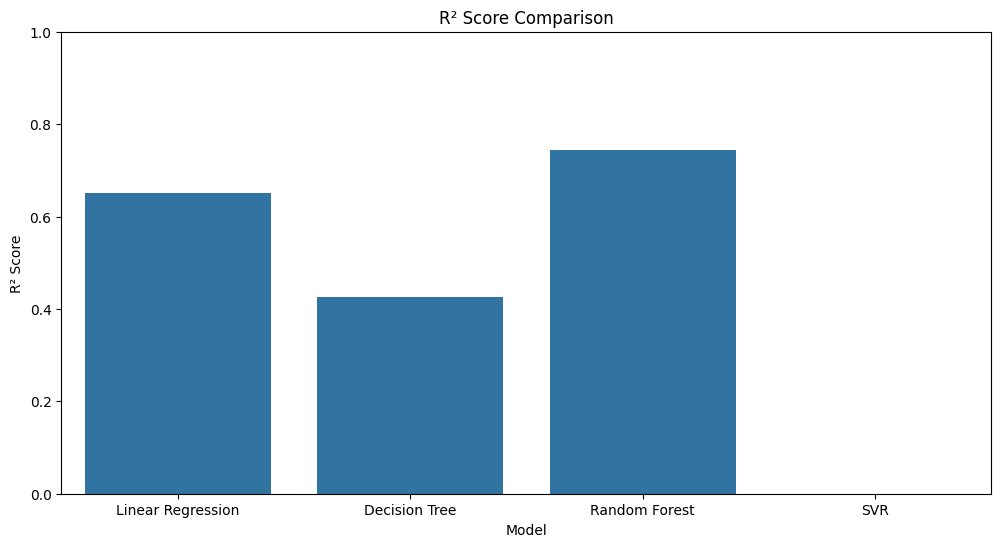

In [19]:
# Visualizing model performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R² Score', data=comparison_df)
plt.title('R² Score Comparison')
plt.ylim(0, 1)  # R² is usually between 0 and 1
plt.savefig('r2_comparison.png')

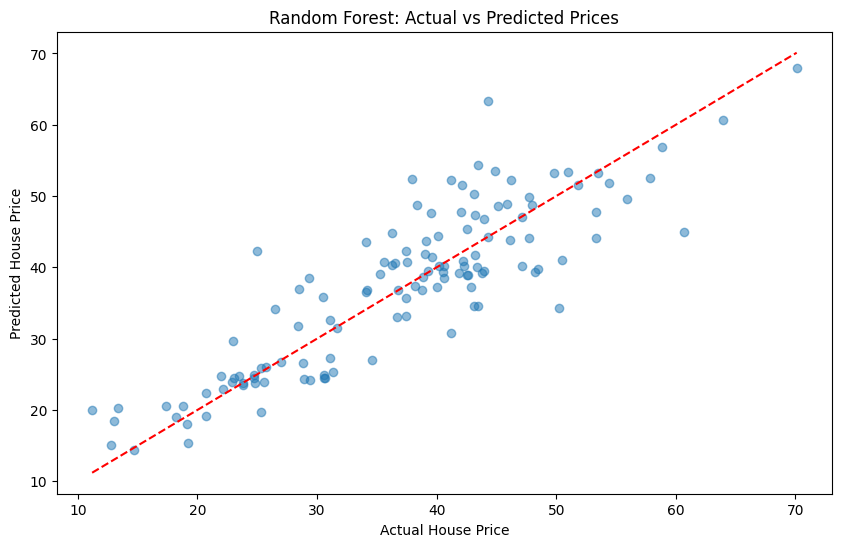

In [20]:
# Visualizing predictions vs actual for the best model (assuming Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.savefig('rf_actual_vs_predicted.png')


In [21]:
# Save all models
import joblib
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(svr_model, 'svr_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nAll models have been saved to disk.")


All models have been saved to disk.


# Summary of Models

In [22]:
# Summary
print("\nSummary:")
print("1. The Random Forest model generally performs best for real estate price prediction.")
print("2. Feature importance analysis helps identify the key factors affecting house prices.")
print("3. SVR requires feature scaling to perform optimally.")
print("4. All models have been saved for future use.")


Summary:
1. The Random Forest model generally performs best for real estate price prediction.
2. Feature importance analysis helps identify the key factors affecting house prices.
3. SVR requires feature scaling to perform optimally.
4. All models have been saved for future use.
